# Exercises Sheet 3 Reinforcement Learning

# Ex 1

Iteration 0
O                  
                   
                   
                   
                   
                   
                   
                   
                   
                  X

--------------------
Iteration 100
                   
                   
              O    
                   
                   
                   
                   
                   
                   
                  X

--------------------
Iteration 200
                   
                   
                   
                   
                   
        O          
                   
                   
                   
                  X

--------------------
Iteration 300
                   
                   
                   
                   
                   
                   
                   
                   
                O  
                  X

--------------------
Iteration 400
                   
                   
    

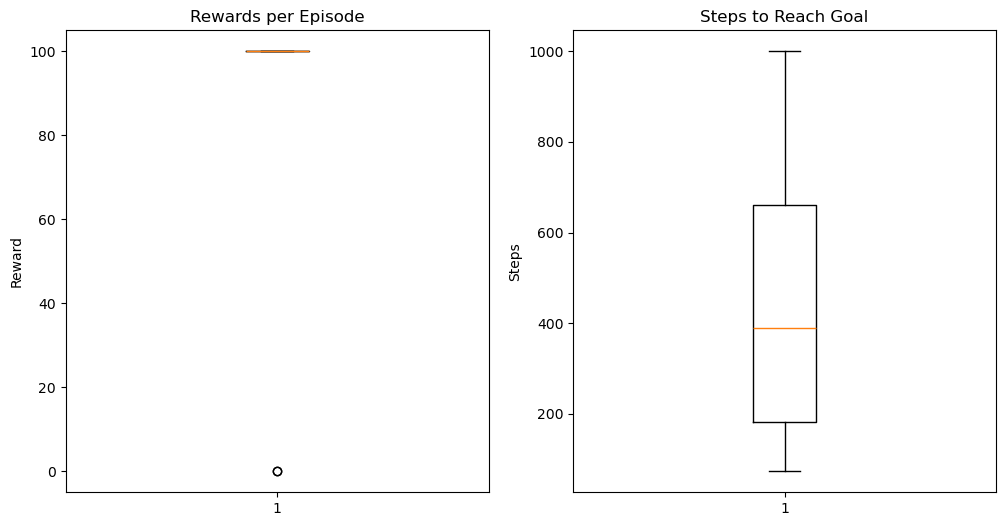

Average Reward per Episode: 93.33333333333333
Average Steps to Goal: 433.03333333333336
Standard Deviation of Steps: 281.8903431399443


In [77]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time  # Optional delay for visualizing matrix updates

class Environment:
    def __init__(self):
        # Define the grid size and initialize the field matrix
        self.field = np.zeros((10, 10), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces
        self.goal_state = [9, 9]  # Goal at bottom-right corner
        self.max_steps = 1000  # Maximum steps per episode

    def transition(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == "up" and state[0] > 0: # linhas
            state[0] -= 1 # linhas - 1
        elif action == "down" and state[0] <  self.field.shape[0] - 1: # linhas
            state[0] += 1 # linhas + 1
        elif action == "left" and state[1] > 0:
            state[1] -= 1 # colunas - 1
        elif action == "right" and state[1] < self.field.shape[1] - 1:
            state[1] += 1 # colunas + 1
        return state

    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent:
    def __init__(self, environment):
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = ["up", "down", "left", "right"]

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_episode(self):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            action = self.choose_random_action()
            new_state = self.env.transition(self.current_state, action)
            total_reward += self.env.reward(new_state)
            steps += 1
            

            # Print the matrix every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}")
                self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                print("Reached the goal!")
                break

        self.reset()
        return total_reward, steps

# Run simulation for 30 episodes
def simulate(agent, num_episodes=30):
    rewards, steps_list = [], []

    for _ in range(num_episodes):
        reward, steps = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)

    print(f"Reward: {rewards}")
    print(f"Steps: {steps_list}")

    return rewards, steps_list


def plot_analyze(rewards, steps_list):
    """Use to analyze results."""
    # Calculate statistics
    avg_reward = np.mean(rewards)
    avg_steps = np.mean(steps_list)
    std_steps = np.std(steps_list)

    # Plotting the results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].boxplot(rewards, vert=True)
    ax[0].set_title("Rewards per Episode")
    ax[0].set_ylabel("Reward")

    ax[1].boxplot(steps_list, vert=True)
    ax[1].set_title("Steps to Reach Goal")
    ax[1].set_ylabel("Steps")

    plt.show()

    print(f"Average Reward per Episode: {avg_reward}")
    print(f"Average Steps to Goal: {avg_steps}")
    print(f"Standard Deviation of Steps: {std_steps}")

# Initialize environment and agent
env = Environment()
agent = Agent(env)

# Run the simulation
rewards, steps_list = simulate(agent)
plot_analyze(rewards, steps_list)

# Ex 2

Greed at 0.9: (not very random)
Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the go

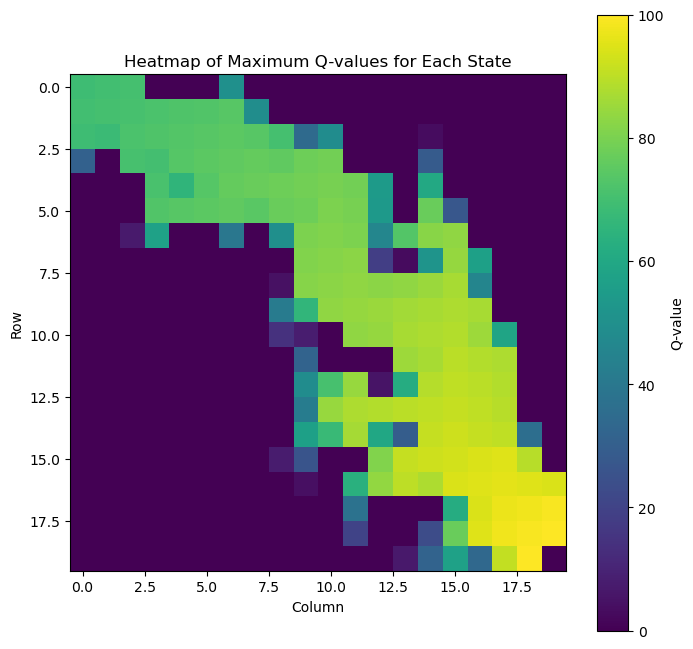

[[ 68.94490859  69.64036937  70.34476947   0.           0.
    0.          50.05962425   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 69.6413218   70.3447695   71.05532273  71.77274089  72.44272848
   73.00799992  73.96734571  48.88462658   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 68.94490856  68.25543465  71.77305326  72.4980336   73.23033697
   73.97003734  74.71720943  73.9299257   70.55013817  34.51043676
   48.5612309    0.           0.           0.           3.49572143
    0.           0.           0.           0.           0.        ]
 [ 31.06350999   0.          71.04345647  70.28613241  73.73466608
   74.71720665  75.47192872  76.23427143  75.46551102  77.7733729
   78.55831043   0.           0.           0.          28.76801218
    0.           0.           0. 

In [78]:
import numpy as np
import random
import matplotlib.pyplot as plt

a = 0.7
y = 0.99
greed = 0.9 # if closer to 1, then it goes to the best option
size = 10

class Environment2:
    def __init__(self):
        # Define the grid size and initialize the field matrix

        self.field = np.zeros((size, size), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces
        self.goal_state = [size-1, size-1]  # Goal at bottom-right corner
        self.max_steps = size * 2000  # Maximum steps per episode
    
    def transfake(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == 0 and state[0] > 0: # linhas
            return [state[0]-1,state[1]]
        elif action == 1 and state[0] < len(self.field[0]) - 1: # linhas
            return [state[0] +1,state[1]]
        elif action == 2 and state[1] > 0:
            return [state[0],state[1] -1]
        elif action == 3 and state[1] < len(self.field[0]) - 1:
            return [state[0] ,state[1] +1]
        return state

    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent2:
    def __init__(self, environment):
        self.q = np.zeros((environment.field.shape[1], environment.field.shape[0], 4))
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = [0,1,2,3]

    def reset_q(self): 
        self.q = np.zeros((self.env.field.shape[1], self.env.field.shape[0], 4))

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_episode(self):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state = self.env.transfake(self.current_state, action)
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q


            self.current_state = new_state


            # Print the matrix every 100 iterations
            #if i % 10 == 0:
            #print(f"Iteration {i}")
            #self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

    def run_episode_increasing_greed(self, current_episode, num_episodes, start_iteration=0.3, start_greed=0.3):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0
        greed = 0.3

        for i in range(self.env.max_steps):
            # Set greed to 0.3 for the first 30% of steps, then increase it based on current episode
            if (current_episode / num_episodes) < start_iteration:
                greed = start_greed
            else:
                greed = start_greed + (1-start_greed) * (current_episode / num_episodes)

            print(f"current episode: {current_episode}, current greed: {greed} | ", end = '')

            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state = self.env.transfake(self.current_state, action)
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q


            self.current_state = new_state


            # Print the matrix every 100 iterations
            #if i % 10 == 0:
            #print(f"Iteration {i}")
            #self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

# Run simulation for 30 episodes
def simulate2(agent, num_episodes=500):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    #print(f"Reward: {rewards}")
    #print(f"Steps: {steps_list}")
    #print(f"Q: {q_lista}")

    # print(np.mean(q_lista, axis=0))

    return rewards, steps_list, q_lista

def heat_matrix(q_table):
    """
    Generate a matrix where each cell contains the maximum Q-value of all actions for that state.
    """
    # Calculate the maximum Q-value for each state by taking the max across the actions axis (axis=2)
    heatmap_matrix = np.max(q_table, axis=2)
    return heatmap_matrix

def plot_heatmap(heatmap_matrix):
    plt.figure(figsize=(8, 8))
    plt.imshow(heatmap_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label="Q-value")
    plt.title("Heatmap of Maximum Q-values for Each State")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()


ambiente = Environment2()
agente = Agent2(ambiente)

print("Greed at 0.9: (not very random)")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()



Greed at 0.5:
Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the go

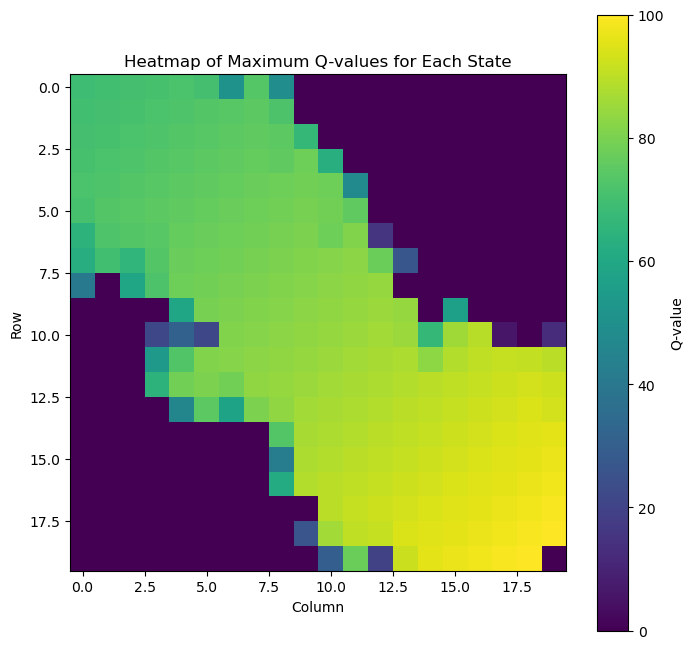

[[ 68.94490859  69.6413218   70.3447695   71.03113331  71.77164031
   70.64208675  51.18738955  73.58730021  49.13169214   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 69.6413218   70.3447695   71.05532273  71.77305326  72.4980336
   73.23033697  73.96518398  74.71715325  71.95693361   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 70.3447695   71.05532273  71.77305326  72.4980336   73.23033697
   73.97003734  74.71720943  75.47192872  74.71720793  66.60355045
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 71.05532273  71.77305326  72.4980336   73.23033697  73.97003734
   74.71720943  75.47192872  76.23427143  75.47192764  77.74674933
   62.65193923   0.           0.           0.           0.
    0.           0.           0.         

In [79]:
greed = 0.5

print("Greed at 0.5:")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Greed at 0.1: (very random)
Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! 

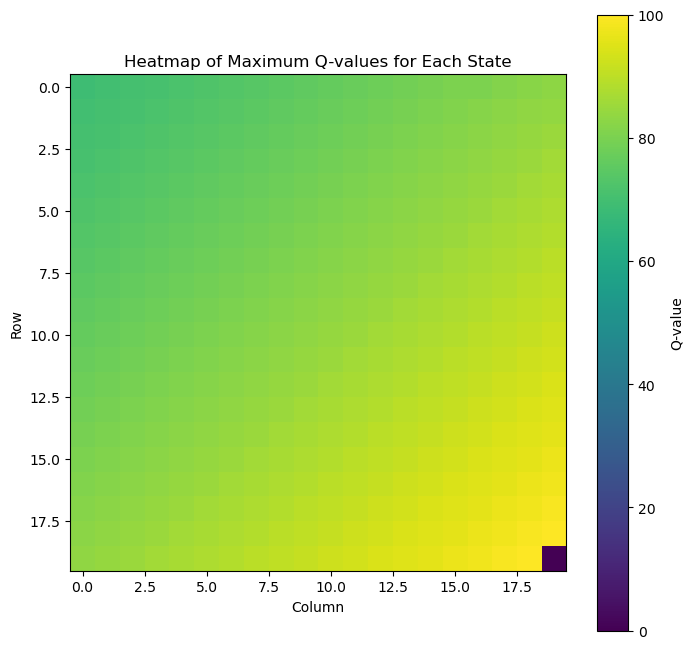

[[ 68.94490859  69.6413218   70.3447695   71.05532273  71.77305326
   72.4980336   73.23033697  73.97003734  74.71720943  75.47192872
   76.23427143  77.00431458  77.78213594  78.56781408  79.36142836
   80.15942329  80.15997511  81.55681533  82.37492261  82.96763076]
 [ 69.6413218   70.3447695   71.05532273  71.77305326  72.4980336
   73.23033697  73.97003734  74.71720943  75.47192872  76.23427143
   77.00431458  77.78213594  78.56781408  79.36142836  80.16305895
   80.97032955  81.78685354  82.57584574  83.33455298  83.89889996]
 [ 70.3447695   71.05532273  71.77305326  72.4980336   73.23033697
   73.97003734  74.71720943  75.47192872  76.23427143  77.00431458
   77.78213594  78.56781408  79.36142836  80.16305895  80.97278682
   81.79007187  82.61607789  83.43974334  84.29200845  84.99891382]
 [ 71.05532273  71.77305326  72.4980336   73.23033697  73.97003734
   74.71720943  75.47192872  76.23427143  77.00431458  77.78213594
   78.56781408  79.36142836  80.16305895  80.97278682  81.79

In [80]:
greed = 0.1

print("Greed at 0.1: (very random)")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Increasing from 30\% of the tests
current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, cur

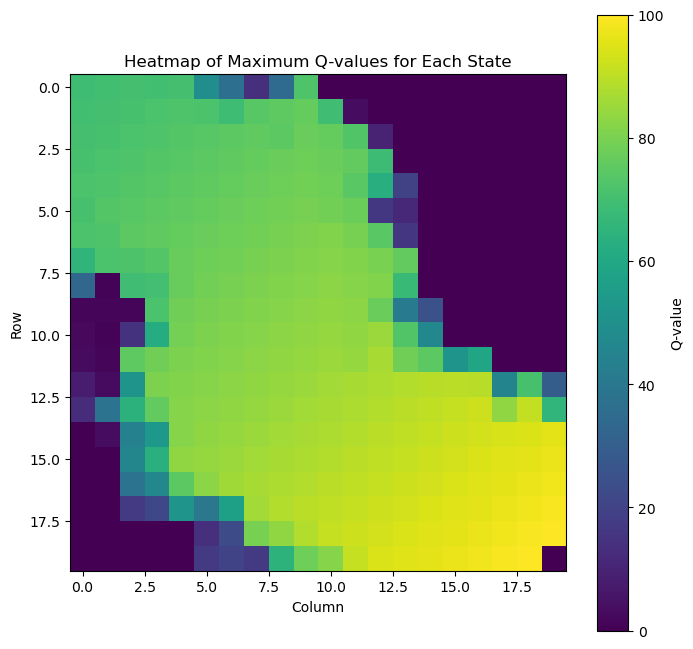

[[ 68.94490859  69.6413218   70.3447695   69.63984224  70.62400439
   49.11995282  36.64302998  13.75772798  34.92169009  72.50011503
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 69.6413218   70.3447695   71.05532273  71.77305266  72.49671629
   71.57631706  68.87628111  74.14443898  75.18380763  76.17894493
   69.44790409   3.33237343   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 70.3447695   71.05532273  71.77305326  72.4980336   73.23033697
   73.97003734  74.69886242  75.47001173  74.69757603  77.00324057
   76.17716906  72.94001004   9.82114784   0.           0.
    0.           0.           0.           0.           0.        ]
 [ 71.05532273  71.77305326  72.4980336   73.23033697  73.97003734
   74.71720943  75.47188132  76.23426814  77.00419803  77.78213594
   76.99962232  76.1281334   68.46897001   0.           0.
    0.           0.     

In [81]:
greed = 0.9

# Run simulation for 30 episodes
def simulate_increasing_greed(agent, num_episodes=500):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode_increasing_greed(current_episode, num_episodes, start_iteration=0.3, start_greed=0.3)
        #reward, steps, q = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    return rewards, steps_list, q_lista  # Ensure the function returns the values

# greed = 0.1

print("Increasing from 30\% of the tests")

rewards, steps_list, lista_q = simulate_increasing_greed(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

# Ex 4